# Ejercicios 4

## Entrega Jueves 29 de Noviembre

1. Generar datos con “corrimiento al rojo” para los datos del Anillo en 2d. Para ello debemos crear mapa de velocidad: 
en una vecindad de $L/10$ de cada punto "pivote" en los datos, encontrar el punto más cercano y generar una velocidad 
para este punto pivote en la dirección del punto más cercano proporcional a su distancia $(v = 0.1dist)$. 
Guardar el nuevo punto con coordenadas

$$
\mathbf{r}=(x, y+v\cdot\hat{j})
$$

Sea $\vec{r}_1$ mi punto pivote y $\vec{r}_2$ el punto más cercano a $\vec{r}_1$. Queremos que $\vec{v}$ vaya en la dirección de $(\vec{r}_2 - \vec{r}_1)$ (unitario), por lo que

$$
\vec{v}\cdot\hat{j} = \Big(v\frac{(\vec{r}_2 - \vec{r}_1)}{|\vec{r}_2 - \vec{r}_1|}\Big)\cdot\hat{j} = (0.1dist)\frac{(\vec{r}_2 - \vec{r}_1)\cdot\hat{j}}{dist} = 0.1(y_2 - y_1)
$$

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import distros
from scipy import spatial

In [81]:
n_points = 1000
r_int = 290.0
r_ext = 300.0
box_size = 1000.0
cte_prop = 0.1

In [82]:
x_anillo, y_anillo = distros.anillo_dist(n_points, r_int, r_ext, box_size / 2.0, box_size / 2.0)
points = np.vstack((x_anillo, y_anillo)).T
y_redshift = []

In [83]:
for pivot in points:
    # La siguiente función encuentra los dos puntos más cercanos al pivote. Yo me quedo
    # con el segundo, porque el primero obviamente es el propio pivote.
    dist, index = spatial.KDTree(points).query(pivot, 2, distance_upper_bound = box_size / 10.0)
    y1 = pivot[1]
    y2 = points[index[1]][1]
    y_new = y1 + cte_prop * (y2 - y1)
    y_redshift.append(y_new)

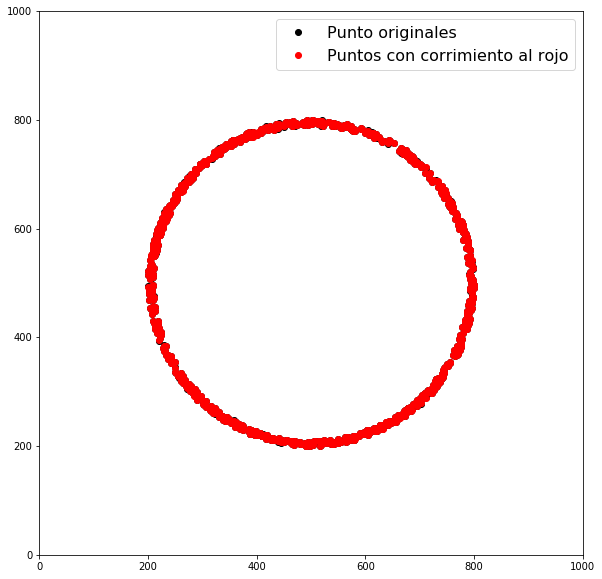

In [84]:
plt.figure(figsize = (10, 10))
plt.xlim([0.0, box_size])
plt.ylim([0.0, box_size])
plt.plot(x_anillo, y_anillo, 'ko', label = 'Punto originales')
plt.plot(x_anillo, y_redshift, 'ro', label = 'Puntos con corrimiento al rojo')
plt.legend(fontsize = 16)
plt.gca().set_aspect('equal')

Casi no se ve la diferencia porque los puntos más cercanos a cada pivote están casi a la misma altura. Con la malla de plano no habría diferencia. Si repetimos con cte. de proporcionalidad 10.0, se empieza a ver algo:

In [85]:
cte_prop = 10.0
y_redshift = []

for pivot in points:
    dist, index = spatial.KDTree(points).query(pivot, 2, distance_upper_bound = box_size / 10.0)
    y1 = pivot[1]
    y2 = points[index[1]][1]
    y_new = y1 + cte_prop * (y2 - y1)
    y_redshift.append(y_new)

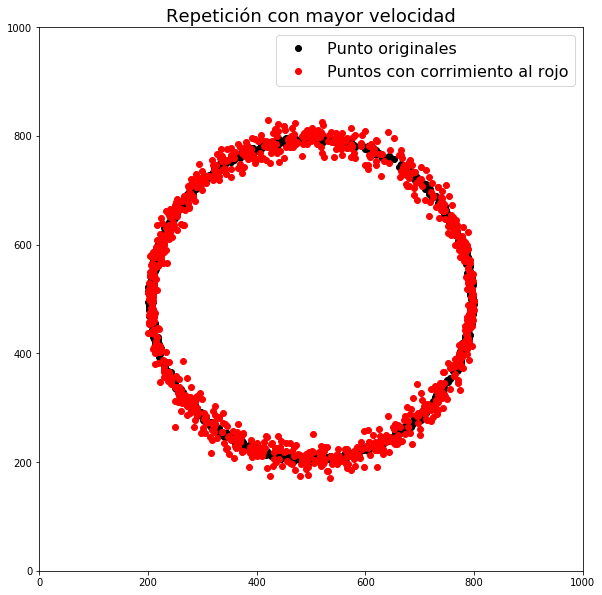

In [88]:
plt.figure(figsize = (10, 10))
plt.xlim([0.0, box_size])
plt.ylim([0.0, box_size])
plt.plot(x_anillo, y_anillo, 'ko', label = 'Punto originales')
plt.plot(x_anillo, y_redshift, 'ro', label = 'Puntos con corrimiento al rojo')
plt.legend(fontsize = 16)
plt.gca().set_aspect('equal')
plt.title('Repetición con mayor velocidad', fontsize = 18);

2. Cambiar el código de la función de correlación con estimador de Landy-Salay, para que sea anisotrópico y guarde la componente  de cada distancia en X y Y. 

   a) Con este código calcular la función de correlación anisotrópica del ejercicio anterior 
   y graficarla como gráfica de densidad en $2d$ (se puede usar imshow de matplotlib).
   
   b) (BONUS) Descomponer en la base de Legendre para encontrar el monopolo, cuadrupolo y hexadecapolo. 
   Graficarlos todos en un mismo plot. [Para realizar este ejercicio debes cambiar la función de correlación a coordenadas polares]